Import requirements module

In [1]:
%matplotlib inline

import numpy as np
import scipy as sp
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from scipy.stats import norm

sns.set_style('white')
sns.set_context('talk')

np.random.seed(123)

Sample 20 points follow standard normal distribution $data \sim Norm(\mu=0; \sigma^2=1)$

In [16]:
data = np.random.randn(30)
print(data.sum())
print(data)

-2.1526004003775543
[ 0.25381648  0.28372536 -1.41188888 -1.87686866 -1.01965507  0.1679423
  0.55385617 -0.53067456  1.37725748 -0.14317597  0.020316   -0.19396387
  0.13402679  0.70447407  0.66565344 -0.89842294  1.52366378 -1.09502646
  0.07922701 -0.27439657 -1.04899168 -0.07512059 -0.74081377  0.07290724
  0.40308596  1.47192937  0.30738422 -0.61122534 -0.39161981  0.13997811]


Show of result of 20 points 

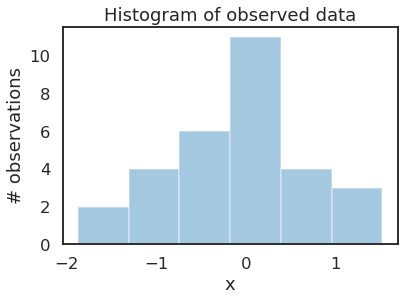

In [17]:
ax = plt.subplot()
sns.distplot(data, kde=False, ax=ax)
_ = ax.set(title='Histogram of observed data', xlabel='x', ylabel='# observations');

Next, we assume that we don't know data is sampled from Standard Normal distribution, but we know deviation of data is $\sigma=1$

So, our goal will be to estimate mean $\mu$ with known deviation $\sigma=1$

Now, we need choose an prior distribution as our knowlegde about this data. Assume that this data is **Normal distribution**; thus, we have $data \sim Norm(\mu, \sigma^2=1)$. And we need estimate this mean $\mu$ based on $Norm(\mu, \sigma^2=1)$ as prior.

With Bayesian inferences method, we will gain the knowlegde about probability distribution of data after each time we had been observed a new value of X on data. Thus, using Bayesian formular, we can approximate proportional $\mu$ such as:

$p(\mu|X)\propto\frac{p(\mu,X)}{p(X)}\propto\frac{p(\mu).p(X|\mu)}{p(X)}\propto p(\mu).p(X|\mu)$

Because X in data is sampled from **a Normal distribution $Norm(\mu, \sigma^2)$**, thus, we have likelihood function for X is:

$p(X|\mu)=\prod_{i=1}^{n}p(x_{i}|\mu)=\prod_{i=1}^{n}\frac{1}{\sqrt{2\pi\sigma^2}}\exp{\{-\frac{(x_{i}-\mu)^2}{2\sigma^2}\}}$

Next, we have been select the prior distribution is Standard Normal distribution, but due to generality, we can select the prior distribution is **the Normal distribution** $Norm(\mu_0, \sigma_0^2)$; thus, we have our prior distribution function for $\mu$ is:

$p(\mu)=\frac{1}{\sqrt{2\pi\sigma_0^2}}\exp{\{-\frac{(\mu-\mu_0)^2}{2\sigma_0^2}\}}$

So, plugging the likelihood and the prior into Bayesian formular, we gain:

$p(\mu|X)\propto\exp{\{\frac{-(\mu-\mu_0)^2}{2\sigma_0^2}+\frac{-\sum_{i=1}^{n}(x_{i}-\mu)^2}{2\sigma^2}\}}$

As we can see, this is a kernel of a probability density function (pdf) we don't know. Focus on the exponential:

$EXP=-\frac{1}{2}[\frac{\mu^2-2\mu.\mu_0+\mu_0^2}{\sigma_0^2} + \frac{\sum_{i=1}^{n}(x_i^2-2x_i\mu+\mu^2)}{\sigma^2}]$

In above formular, any term that doesn't include $\mu$ can be drop as approximate proportionality. Additionally, $\sum_{i=1}^{n}x_i=n\overline{x}$, So, we gain:

$EXP\propto\frac{\mu^2-2\mu.\mu_0}{\sigma_0^2}+\frac{-2n\overline{x}\mu+n\mu^2}{\sigma^2}=\frac{\sigma^2\mu^2-2\sigma^2\mu\mu_0-2\sigma_0^{2}n\overline{x}\mu+\sigma_0^{2}n\sigma^2}{\sigma^2\sigma_0^2}$

$=\frac{(n\sigma_0^2+\sigma^2)\mu^2-2\mu(\sigma^2\mu_0+\sigma_0^2n\overline{x})}{\sigma^2\sigma_0^2}=\frac{\mu^2-2\mu\frac{\sigma^2\mu_0+\sigma_0^2n\overline{x}}{n\sigma_0^2+\sigma^2}}{\frac{\sigma^2\sigma_0^2}{n\sigma_0^2+\sigma^2}}$

$\propto\frac{\mu^2-2\mu\frac{\sigma^2\mu_0+\sigma_0^2n\overline{x}}{n\sigma_0^2+\sigma^2}+({\frac{\sigma^2\mu_0+\sigma_0^2n\overline{x}}{n\sigma_0^2+\sigma^2}})^2}{\frac{\sigma^2\sigma_0^2}{n\sigma_0^2+\sigma^2}}=\frac{(\mu-\frac{\sigma^2\mu_0+\sigma_0^2n\overline{x}}{n\sigma_0^2+\sigma^2})^2}{\frac{\sigma^2\sigma_0^2}{n\sigma_0^2+\sigma^2}}$

Well, we can see that this kernel exponential is the Normal distribution with:

mean: $\frac{\sigma^2\mu_0+\sigma_0^2n\overline{x}}{n\sigma_0^2+\sigma^2}$
and variance: $\frac{\sigma^2\sigma_0^2}{n\sigma_0^2+\sigma^2}$

After all, this mean and variance formular is used to calculate the posterior mean and posterior variance of data.

In this example, we have $\mu_0=0$ and $\sigma_0^2=1$, the data has $\sigma=1$ 

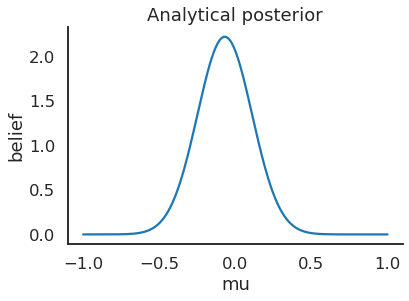

In [18]:
def calc_posterior_analytical(data, x, mu_0, sigma_0):
    sigma = 1.
    n = len(data)
    mu_post = (mu_0 / sigma_0**2 + data.sum() / sigma**2) / (1. / sigma_0**2 + n / sigma**2)
    sigma_post = (1. / sigma_0**2 + n / sigma**2)**-1
    return norm(mu_post, np.sqrt(sigma_post)).pdf(x)



ax = plt.subplot()
x = np.linspace(-1, 1, 500)
posterior_analytical = calc_posterior_analytical(data, x, 0., 1.)
ax.plot(x, posterior_analytical)
ax.set(xlabel='mu', ylabel='belief', title='Analytical posterior');
sns.despine()

However, in the case that the truly probability of data is very complex, we cannot approximate proportionality become any known probability distribution. To solve this issue, we can using MCMC

In [20]:
mu_current = 1.

In [25]:
def sampler(data, samples=4, mu_init=.5, proposal_width=.5, plot=False, mu_prior_mu=0, mu_prior_sd=1.):
    mu_current = mu_init
    posterior = [mu_current]
    for i in range(samples):
        # suggest new position
        mu_proposal = norm(mu_current, proposal_width).rvs()

        # Compute likelihood by multiplying probabilities of each data point
        likelihood_current = norm(mu_current, 1).pdf(data).prod()
        likelihood_proposal = norm(mu_proposal, 1).pdf(data).prod()
        
        # Compute prior probability of current and proposed mu        
        prior_current = norm(mu_prior_mu, mu_prior_sd).pdf(mu_current)
        prior_proposal = norm(mu_prior_mu, mu_prior_sd).pdf(mu_proposal)
        
        p_current = likelihood_current * prior_current
        p_proposal = likelihood_proposal * prior_proposal
        
        # Accept proposal?
        p_accept = p_proposal / p_current
        
        # Usually would include prior probability, which we neglect here for simplicity
        accept = np.random.rand() < p_accept
        
        if plot:
            plot_proposal(mu_current, mu_proposal, mu_prior_mu, mu_prior_sd, data, accept, posterior, i)
        
        if accept:
            # Update position
            mu_current = mu_proposal
        
        posterior.append(mu_current)
        print(np.array(posterior))
    return np.array(posterior)

# Function to display
def plot_proposal(mu_current, mu_proposal, mu_prior_mu, mu_prior_sd, data, accepted, trace, i):
    from copy import copy
    trace = copy(trace)
    fig, (ax1, ax2, ax3, ax4) = plt.subplots(ncols=4, figsize=(16, 4))
    fig.suptitle('Iteration %i' % (i + 1))
    x = np.linspace(-3, 3, 5000)
    color = 'g' if accepted else 'r'
        
    # Plot prior
    prior_current = norm(mu_prior_mu, mu_prior_sd).pdf(mu_current)
    prior_proposal = norm(mu_prior_mu, mu_prior_sd).pdf(mu_proposal)
    prior = norm(mu_prior_mu, mu_prior_sd).pdf(x)
    ax1.plot(x, prior)
    ax1.plot([mu_current] * 2, [0, prior_current], marker='o', color='b')
    ax1.plot([mu_proposal] * 2, [0, prior_proposal], marker='o', color=color)
    ax1.annotate("", xy=(mu_proposal, 0.2), xytext=(mu_current, 0.2),
                 arrowprops=dict(arrowstyle="->", lw=2.))
    ax1.set(ylabel='Probability Density', title='current: prior(mu=%.2f) = %.2f\nproposal: prior(mu=%.2f) = %.2f' % (mu_current, prior_current, mu_proposal, prior_proposal))
    
    # Likelihood
    likelihood_current = norm(mu_current, 1).pdf(data).prod()
    likelihood_proposal = norm(mu_proposal, 1).pdf(data).prod()
    y = norm(loc=mu_proposal, scale=1).pdf(x)
    sns.distplot(data, kde=False, norm_hist=True, ax=ax2)
    ax2.plot(x, y, color=color)
    ax2.axvline(mu_current, color='b', linestyle='--', label='mu_current')
    ax2.axvline(mu_proposal, color=color, linestyle='--', label='mu_proposal')
    #ax2.title('Proposal {}'.format('accepted' if accepted else 'rejected'))
    ax2.annotate("", xy=(mu_proposal, 0.2), xytext=(mu_current, 0.2),
                 arrowprops=dict(arrowstyle="->", lw=2.))
    ax2.set(title='likelihood(mu=%.2f) = %.2f\nlikelihood(mu=%.2f) = %.2f' % (mu_current, 1e14*likelihood_current, mu_proposal, 1e14*likelihood_proposal))
    
    # Posterior
    posterior_analytical = calc_posterior_analytical(data, x, mu_prior_mu, mu_prior_sd)
    ax3.plot(x, posterior_analytical)
    posterior_current = calc_posterior_analytical(data, mu_current, mu_prior_mu, mu_prior_sd)
    posterior_proposal = calc_posterior_analytical(data, mu_proposal, mu_prior_mu, mu_prior_sd)
    ax3.plot([mu_current] * 2, [0, posterior_current], marker='o', color='b')
    ax3.plot([mu_proposal] * 2, [0, posterior_proposal], marker='o', color=color)
    ax3.annotate("", xy=(mu_proposal, 0.2), xytext=(mu_current, 0.2),
                 arrowprops=dict(arrowstyle="->", lw=2.))
    #x3.set(title=r'prior x likelihood $\propto$ posterior')
    ax3.set(title='posterior(mu=%.2f) = %.5f\nposterior(mu=%.2f) = %.5f' % (mu_current, posterior_current, mu_proposal, posterior_proposal))
    
    if accepted:
        trace.append(mu_proposal)
    else:
        trace.append(mu_current)
    ax4.plot(trace)
    ax4.set(xlabel='iteration', ylabel='mu', title='trace')
    plt.tight_layout()
    #plt.legend()

[-1. -1.]
[-1.         -1.         -0.50132728]
[-1.         -1.         -0.50132728 -0.50132728]
[-1.         -1.         -0.50132728 -0.50132728  0.32439099]
[-1.         -1.         -0.50132728 -0.50132728  0.32439099  0.32439099]
[-1.         -1.         -0.50132728 -0.50132728  0.32439099  0.32439099
  0.10993468]
[-1.         -1.         -0.50132728 -0.50132728  0.32439099  0.32439099
  0.10993468 -0.2295084 ]
[-1.         -1.         -0.50132728 -0.50132728  0.32439099  0.32439099
  0.10993468 -0.2295084  -0.27686288]


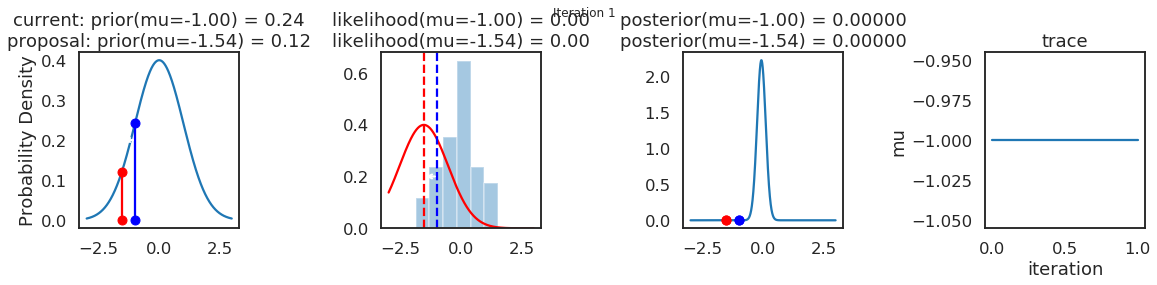

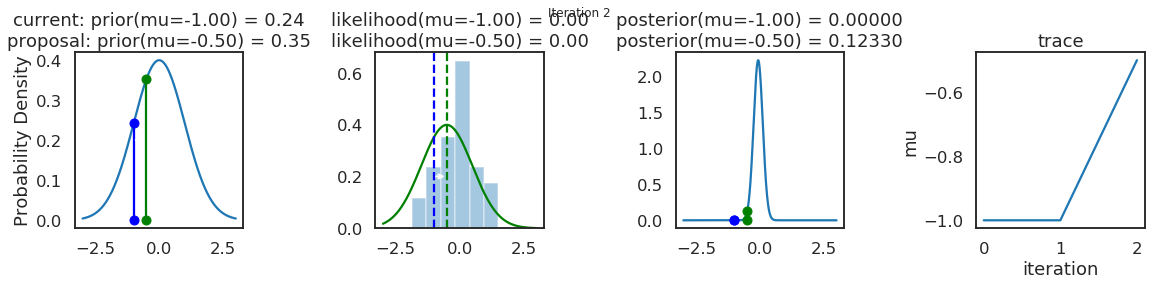

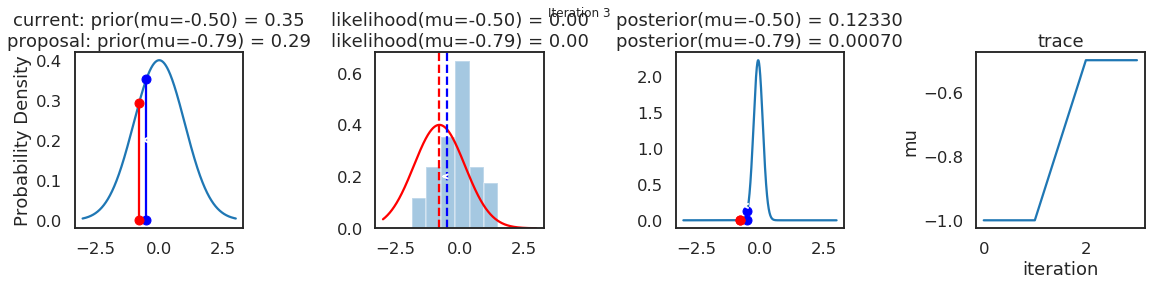

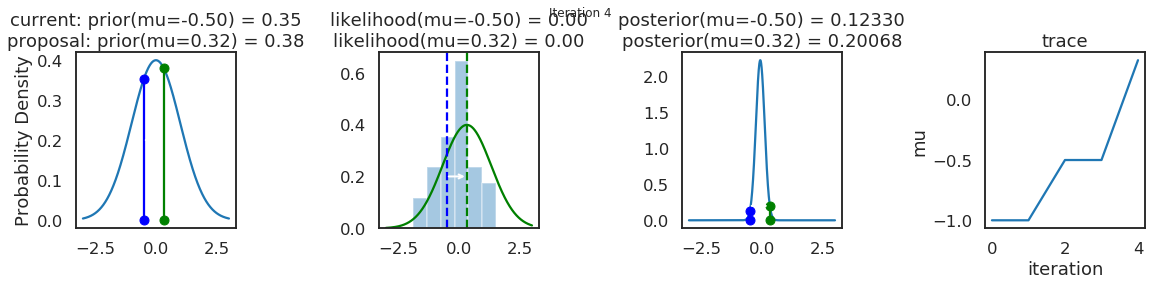

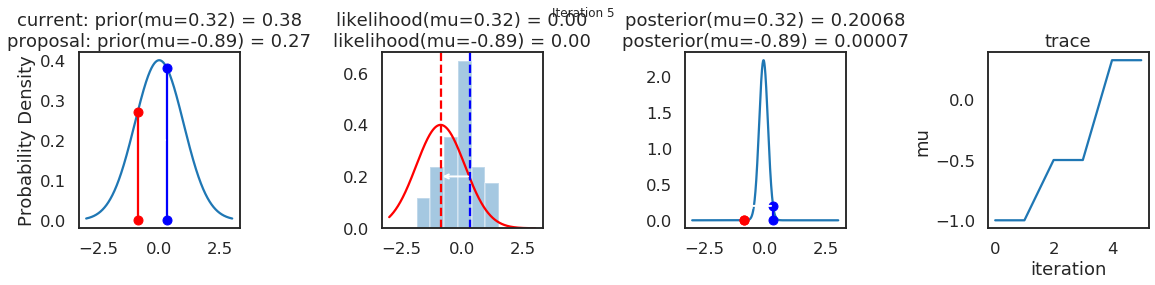

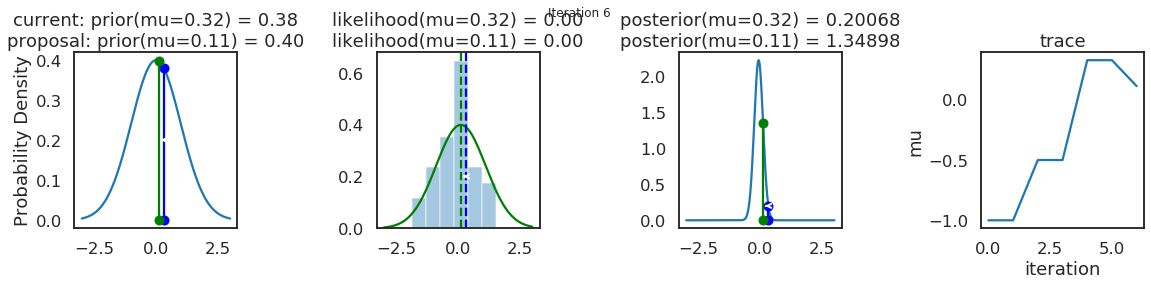

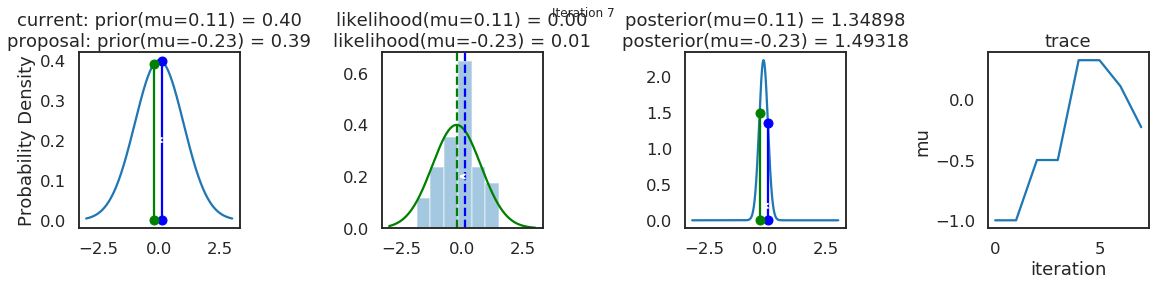

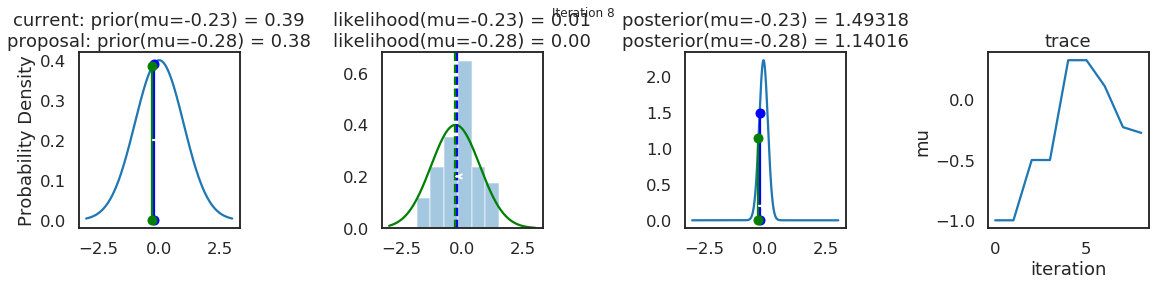

In [26]:
np.random.seed(123)
sampler(data, samples=8, mu_init=-1., plot=True);

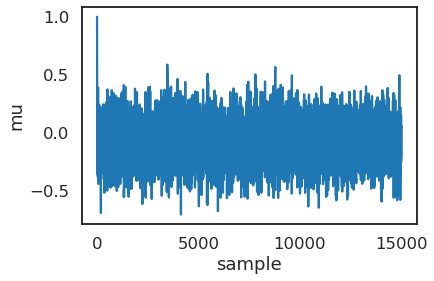

In [24]:
posterior = sampler(data, samples=15000, mu_init=1.)
fig, ax = plt.subplots()
ax.plot(posterior)
_ = ax.set(xlabel='sample', ylabel='mu');

In [ ]:
ax = plt.subplot()

sns.distplot(posterior[500:], ax=ax, label='estimated posterior')
x = np.linspace(-.5, .5, 500)
post = calc_posterior_analytical(data, x, 0, 1)
ax.plot(x, post, 'g', label='analytic posterior')
_ = ax.set(xlabel='mu', ylabel='belief');
ax.legend();

In [ ]:
posterior_small = sampler(data, samples=5000, mu_init=1., proposal_width=.01)
fig, ax = plt.subplots()
ax.plot(posterior_small);
_ = ax.set(xlabel='sample', ylabel='mu');

In [ ]:
posterior_large = sampler(data, samples=5000, mu_init=1., proposal_width=3.)
fig, ax = plt.subplots()
ax.plot(posterior_large); plt.xlabel('sample'); plt.ylabel('mu');
_ = ax.set(xlabel='sample', ylabel='mu');

In [ ]:
sns.distplot(posterior_small[1000:], label='Small step size')
sns.distplot(posterior_large[1000:], label='Large step size');
_ = plt.legend();

In [ ]:
from pymc3.stats import autocorr
lags = np.arange(1, 100)
fig, ax = plt.subplots()
ax.plot(lags, [autocorr(posterior_large, l) for l in lags], label='large step size')
ax.plot(lags, [autocorr(posterior_small, l) for l in lags], label='small step size')
ax.plot(lags, [autocorr(posterior, l) for l in lags], label='medium step size')
ax.legend(loc=0)
_ = ax.set(xlabel='lag', ylabel='autocorrelation', ylim=(-.1, 1))